## Simple Recommender

In [1]:
import pandas as pd
import numpy as np

In [2]:
metadata = pd.read_csv('data/movies_metadata.csv', low_memory = False)

### ดึงข้อมูลมา 20,000 row

ลดเวลาโดย ต้องการแค่ 20,000 row

metadata = metadata[:20000] จาก 0-20000

In [51]:
metadata.head(2) 

# ต้องการดูแค่ 2 ตัวแรก

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [4]:
C = metadata['vote_average'].mean() # หาค่าเฉลี่ยของ 'Vote_average' การโหวต
C

5.618207215134185

* หา m คือจำนวนโหวตน้อยที่สุดสำหรับใช้ในการ จัดอันดับ โดยใช้เป็น quatile ที่ 90%

In [5]:
m = metadata['vote_count'].quantile(0.90)
m

# จะได้ 160 คือ ต้องได้การโหวตอย่างน้อย 160 

160.0

* กรองเฉพาะภาพยนต์ที่มีการโหวตมากกว่าจำนวน m(การโหวต 160 ครั้ง)

In [6]:
q_movies = metadata.copy().loc[metadata['vote_count']>=m]
q_movies.shape # .shape ดู size

# จะได้คือ มีการโหวตมากกว่า 160 จำนวน 4555 ครั้ง

(4555, 24)

* สร้าง function สำหรับคำนวณ wieghted rating

In [52]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R)+(m/(m+v)*C) # return ค่าที่ต้องการคำนวณ

In [8]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1) # axis = 1 ส่งหนังไปทีละเรื่องเพื่อคำนวณ

In [9]:
q_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.640253
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820293


In [10]:
q_movies = q_movies.sort_values('score', ascending = False) # จัดเรียงหนังที่มีคะแนนจากมากไปน้อย

In [11]:
q_movies[['title','vote_average','vote_count','score']].head(10) 

# ดู อันดับแรกในคอลัมน์ vote_avg, vote_count, score

,title,vote_average,vote_count,score
314,The Shawshank Redemption,8.5,8358.0,8.445869
834,The Godfather,8.5,6024.0,8.425439
10309,Dilwale Dulhania Le Jayenge,9.1,661.0,8.421453
12481,The Dark Knight,8.3,12269.0,8.265477
2843,Fight Club,8.3,9678.0,8.256385
292,Pulp Fiction,8.3,8670.0,8.251406
522,Schindler's List,8.3,4436.0,8.206639
23673,Whiplash,8.3,4376.0,8.205404
5481,Spirited Away,8.3,3968.0,8.196055
2211,Life Is Beautiful,8.3,3643.0,8.187171


## Workshop rating_amazon

สร้าง weighted rating ด้วยการกำหนดค่านำหนักด้วยตัวเอง จากข้อมูลการซื้อสินค้าผลิตภัณฑ์เสริมความงามจากเว็ป amazon

In [12]:
beauty = pd.read_csv('data/ratings_beauty.csv')

In [13]:
beauty.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [14]:
by_product = beauty.groupby('ProductId')

In [15]:
counts = by_product.count()['UserId']

In [16]:
ratings = by_product.mean()['Rating']

In [17]:
summary = pd.concat([counts, ratings], axis=1)

In [18]:
summary

,UserId,Rating
ProductId,,
0205616461,1,5.0
0558925278,2,4.0
0733001998,1,4.0
0737104473,1,1.0
0762451459,1,5.0
...,...,...
B00LORWRJA,1,5.0
B00LOS7MEE,1,5.0
B00LP2YB8E,1,5.0


In [19]:
m2 = summary['UserId'].quantile(0.9)
m2

15.0

In [20]:
C2 = summary['Rating'].mean()
C2

4.149251141223176

In [21]:
def weighted_rating_amazon(x, m2=m2, C2=C2):
    v = x['UserId']
    R = x['Rating']
    return (v/(v+m2)*R) + (m2/(m2+v)*C2)

In [22]:
q_product = summary.copy().loc[summary['UserId']>=m2]
q_product.shape

(25389, 2)

In [23]:
q_product

,UserId,Rating
ProductId,,
1304351475,16,3.562500
3227001381,25,4.560000
602260074X,15,4.266667
7535842801,17,4.470588
7806397051,35,3.285714
...,...,...
B00L5KTZ0K,15,5.000000
B00L6Q3BH6,19,4.421053
B00LAOMUUS,16,4.625000


In [24]:
q_product['score'] = q_product.apply(weighted_rating_amazon, axis=1)

In [25]:
q_product

,UserId,Rating,score
ProductId,,,
1304351475,16,3.562500,3.846412
3227001381,25,4.560000,4.405969
602260074X,15,4.266667,4.207959
7535842801,17,4.470588,4.319961
7806397051,35,3.285714,3.544775
...,...,...,...
B00L5KTZ0K,15,5.000000,4.574626
B00L6Q3BH6,19,4.421053,4.301140
B00LAOMUUS,16,4.625000,4.394799


In [26]:
q_product = q_product.sort_values('score',ascending = False)

In [27]:
q_product

,UserId,Rating,score
ProductId,,,
B00GJX58PE,398,4.889447,4.862564
B00K7ER6LU,85,4.976471,4.852388
B00I46E8DC,172,4.912791,4.851544
B00F008GFQ,426,4.868545,4.844079
B002YFN49I,98,4.948980,4.842821
...,...,...,...
B0026K2KE6,63,1.682540,2.156907
B0017KCPUK,45,1.311111,2.020646
B004ROOT8Y,51,1.372549,2.003618


In [29]:
#%pip install wordcloud

In [30]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [31]:
overview_corpus = ' '.join(metadata['overview'].astype('str'))

In [32]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS,
                              background_color = 'white',
                              height = 2000,
                              width = 4000).generate(overview_corpus)

(-0.5, 3999.5, 1999.5, -0.5)

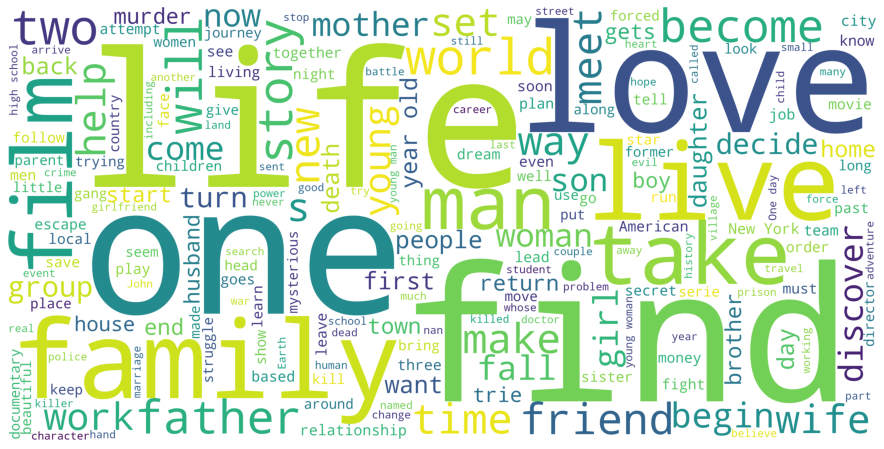

In [33]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(stop_words='english')

In [36]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [37]:
metadata['overview'] = metadata['overview'].fillna('')

In [38]:
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

In [39]:
tfidf_matrix.shape

(45466, 75827)

In [40]:
tfidf.get_feature_names()[5000:5010]

['avails',
 'avaks',
 'avalanche',
 'avalanches',
 'avallone',
 'avalon',
 'avant',
 'avanthika',
 'avanti',
 'avaracious']

In [41]:
from sklearn.metrics.pairwise import linear_kernel

In [42]:
cosine_overview = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
cosine_overview.shape

(45466, 45466)

In [44]:
cosine_overview[:4,:4]

array([[1.        , 0.01504121, 0.        , 0.        ],
       [0.01504121, 1.        , 0.04681953, 0.        ],
       [0.        , 0.04681953, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [45]:
indices = pd.Series(metadata.index, index = metadata['title']).drop_duplicates()

In [46]:
indices[:10]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

In [47]:
def get_recommendation(title, cosine_sim=cosine_overview):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indics = [i[0] for i in sim_scores]
    return metadata['title'].iloc[movie_indics]

In [48]:
get_recommendation('The Dark Knight Rises')

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [49]:
get_recommendation('Jumanji')

21633         Table No. 21
45253                 Quiz
41573         Snowed Under
35509             The Mend
44376    Liar Game: Reborn
17223       The Dark Angel
8801               Quintet
6166             Brainscan
30981         Turkey Shoot
9503             Word Wars
Name: title, dtype: object

In [50]:
get_recommendation('Fast & Furious')

17052                            Fast Five
4241              The Fast and the Furious
28206    Lilla Jönssonligan på styva linan
19164                             The Firm
43255              The Fate of the Furious
38676                      A Mother's Rage
19616                               Drones
44870                  Bullets Over Summer
27237       Witchboard III: The Possession
41316                  A Christmas Romance
Name: title, dtype: object